In [8]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np

In [9]:
madx = Madx(stdout=True)

madx.call('general_tt20p42_unsplit.madx') 


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.11.28 17:23:06      +
  ++++++++++++++++++++++++++++++++++++++++++++
!==============================================================================================

! MADX file for TT24-BDF UNSPLIT optics

!

! A. Gorn, F.M. Velotti

!

!==============================================================================================

option, RBARC=FALSE;

option, echo;



title, "TT24BDF UNSPLIT optics";



/***************************************

* Cleaning .tfs output files

***************************************/



system, "rm *.tfs";

system, "rm ./jmad/*.tfs";

system, "rm ./jmad/*.inp";

system, "rm ./jmad/*.seq";

/***************************************

* Load needed repos

***************************************/



system,"[ ! -e ea_repo ] && git clone -b en-ea-l

rm: ./jmad/*.tfs: No such file or directory
rm: ./jmad/*.inp: No such file or directory
rm: ./jmad/*.seq: No such file or directory
Cloning into 'ea_repo'...


system, "ln -fns ./../tt20t2 tt20_repo";

system, "ln -fns ./../tt20t4_sftpro_unsplit/line tt20_optics";

system, "ln -fns ./../tt24t4 tt24_model";

!system, "ln -fns ./../sps_ext_elements sps_extr_repo";

!call, file="sps_extr_repo/fast_extraction_macros.cmdx";



set, format="22.10e";

option, -echo, warn, info;

++++++ info: kqnlf2410m redefined
++++++ info: kqtld2402 redefined
++++++ info: kqtlf2403m redefined
++++++ info: kqnlf2405m redefined
++++++ info: kqtad2407m redefined
++++++ info: kqtaf2202m redefined
++++++ info: kqtad2204 redefined
++++++ info: kqtld2101 redefined
++++++ info: kqtlf2102 redefined
++++++ info: kqtld2103 redefined
++++++ info: kqnlf2104 redefined
++++++ info: kqnld2105m redefined
++++++ info: kqnl2112m redefined
++++++ info: kqnl2113m redefined
++++++ info: kqtl2114m redefined
++++++ info: kqnl2115m redefined
++++++ info: kqtl2116m redefined
++++++ info: kqm2117 redefined
++++++ info: kqnlf2106m redefined
++++++ info: kqts2112m redefined
++++++ info: kqts2

In [10]:
madx.use(sequence='tt20p42')
madx.select(flag='twiss', column=['s', 'l', 'betx', 'bety', 'betx', 'bety','dx', 'dy', 'mux','muy', 'N1', 'apertype', 'aper_1', 'aper_2'])
twiss = madx.twiss(beta0='initbeta0').dframe()

enter Twiss module
 Found 6 initial orbit vector values from twiss command. 
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

                length                 orbit5                   alfa                gammatr 
      1.7171806400e+03      -0.0000000000e+00       0.0000000000e+00       0.0000000000e+00 

                    q1                    dq1                betxmax                  dxmax 
      5.0881095991e+00       0.0000000000e+00       1.1507538402e+03       1.1308299468e+01 

                 dxrms                 xcomax                 xcorms                     q2 
      1.8906156205e+00       0.0000000000e+00       0.0000000000e+00       4.2129990885e+00 

                   dq2                betymax                  dymax          

In [11]:
from pybt import read_twiss_file

pars, tw = read_twiss_file('twiss_tt20p42_unsplit.tfs')
tw['name'] = tw.index
tw

keyword           s        l  aper_1  aper_2 apertype  \
name                                                                         
tt20p42$start         marker     0.00000   0.0000     0.0     0.0   circle   
tt21tt22$start        marker     0.00000   0.0000     0.0     0.0   circle   
tt20t2$start          marker     0.00000   0.0000     0.0     0.0   circle   
ejpt                  marker     0.00000   0.0000     0.0     0.0   circle   
drift_0                drift    10.54780  10.5478     0.0     0.0     none   
...                      ...         ...      ...     ...     ...      ...   
drift_264              drift  1716.98064   0.2600     0.0     0.0     none   
tbacb.x1010000    instrument  1717.18064   0.2000     0.0     0.0   circle   
endp42                marker  1717.18064   0.0000     0.0     0.0   circle   
p42_selected$end      marker  1717.18064   0.0000     0.0     0.0   circle   
tt20p42$end           marker  1717.18064   0.0000     0.0     0.0   circle   

                  tilt  kick  hkick  vkick  ...   py        dx       dpx  \
name                                        ...                            
tt20p42$start      0.0   0.0    0.0    0.0  ...  0.0  0.001698  0.000660   
tt21tt22$start     0.0   0.0    0.0    0.0  ...  0.0  0.001698  0.000660   
tt20t2$start       0.0   0.0    0.0    0.0  ...  0.0  0.001698  0.000660   
ejpt               0.0   0.0    0.0    0.0  ...  0.0  0.001698  0.000660   
drift_0            0.0   0.0    0.0    0.0  ...  0.0  0.008659  0.000660   
...                ...   ...    ...    ...  ...  ...       ...       ...   
drift_264          0.0   0.0    0.0    0.0  ...  0.0 -0.143432 -0.035968   
tbacb.x1010000     0.0   0.0    0.0    0.0  ...  0.0 -0.150626 -0.035968   
endp42             0.0   0.0    0.0    0.0  ...  0.0 -0.150626 -0.035968   
p42_selected$end   0.0   0.0    0.0    0.0  ...  0.0 -0.150626 -0.035968   
tt20p42$end        0.0   0.0    0.0    0.0  ...  0.0 -0.150626 -0.035968   

                        dy       dpy      alfx      alfy       mux       muy  \
name                                                                           
tt20p42$start     0.289000  0.003480 -1.735810 -3.201112  0.000000  0.000000   
tt21tt22$start    0.289000  0.003480 -1.735810 -3.201112  0.000000  0.000000   
tt20t2$start      0.289000  0.003480 -1.735810 -3.201112  0.000000  0.000000   
ejpt              0.289000  0.003480 -1.735810 -3.201112  0.000000  0.000000   
drift_0           0.325706  0.003480 -3.462845 -4.236308  0.038441  0.011296   
...                    ...       ...       ...       ...       ...       ...   
drift_264        -0.069826  0.020703 -0.246807  0.346424  5.047906  4.203818   
tbacb.x1010000   -0.065685  0.020703 -0.539281  0.283012  5.088110  4.212999   
endp42           -0.065685  0.020703 -0.539281  0.283012  5.088110  4.212999   
p42_selected$end -0.065685  0.020703 -0.539281  0.283012  5.088110  4.212999   
tt20p42$end      -0.065685  0.020703 -0.539281  0.283012  5.088110  4.212999   

                              name  
name                                
tt20p42$start        tt20p42$start  
tt21tt22$start      tt21tt22$start  
tt20t2$start          tt20t2$start  
ejpt                          ejpt  
drift_0                    drift_0  
...                            ...  
drift_264                drift_264  
tbacb.x1010000      tbacb.x1010000  
endp42                      endp42  
p42_selected$end  p42_selected$end  
tt20p42$end            tt20p42$end  

[577 rows x 34 columns]


  Number of warnings: 5
5 in C and 0 in Fortran

  ++++++++++++++++++++++++++++++++++++++++++++
  +          MAD-X finished normally         +
  ++++++++++++++++++++++++++++++++++++++++++++


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
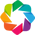

In [12]:
# To install:
# pip install git+https://github.com/gornalexander/madtools
import madplotter as mp
import holoviews as hv

hv.extension('bokeh')

In [13]:
layout =\
mp.plot_synoptic(tw, show_markers=True, show_names=True) +\
mp.plot_lattice(tw, show_markers=True, ylim=(-0.1, 0.1)) 

layout.cols(1)

:Layout
   .Overlay.I   :Overlay
      .HLine.I        :HLine   [x,y]
      .Rectangles.I   :Rectangles   [s,bottom,right,top]   (color,keyword,name,s,apertype,aper_1,aper_2,l,tilt,angle,k1l)
      .Rectangles.II  :Rectangles   [x0,y0,x1,y1]   (color,keyword,name,s,apertype,aper_1,aper_2,l,tilt,angle,k1l)
      .Text.I         :Text   [x,y]
      .Text.II        :Text   [x,y]
      .Text.III       :Text   [x,y]
      .Text.IV        :Text   [x,y]
      .Text.V         :Text   [x,y]
      .Text.VI        :Text   [x,y]
      .Text.VII       :Text   [x,y]
      .Text.VIII      :Text   [x,y]
      .Text.IX        :Text   [x,y]
      .Text.X         :Text   [x,y]
      .Text.XI        :Text   [x,y]
      .Text.XII       :Text   [x,y]
      .Text.XIII      :Text   [x,y]
      .Text.XIV       :Text   [x,y]
      .Text.XV        :Text   [x,y]
      .Text.XVI       :Text   [x,y]
      .Text.XVII      :Text   [x,y]
      .Text.XVIII     :Text   [x,y]
      .Text.XIX       :Text   [x,y]
      .Text.XX        :Text   [x,y]
      .Text.XXI       :Text   [x,y]
      .Text.XXII      :Text   [x,y]
      .Text.XXIII     :Text   [x,y]
      .Text.XXIV      :Text   [x,y]
      .Text.XXV       :Text   [x,y]
      .Text.XXVI      :Text   [x,y]
      .Text.XXVII     :Text   [x,y]
      .Text.XXVIII    :Text   [x,y]
      .Text.XXIX      :Text   [x,y]
      .Text.XXX       :Text   [x,y]
      .Text.XXXI      :Text   [x,y]
      .Text.XXXII     :Text   [x,y]
      .Text.XXXIII    :Text   [x,y]
      .Text.XXXIV     :Text   [x,y]
      .Text.XXXV      :Text   [x,y]
      .Text.XXXVI     :Text   [x,y]
      .Text.XXXVII    :Text   [x,y]
      .Text.XXXVIII   :Text   [x,y]
      .Text.XXXIX     :Text   [x,y]
      .Text.XL        :Text   [x,y]
      .Text.XLI       :Text   [x,y]
      .Text.XLII      :Text   [x,y]
      .Text.XLIII     :Text   [x,y]
      .Text.XLIV      :Text   [x,y]
      .Text.XLV       :Text   [x,y]
      .Text.XLVI      :Text   [x,y]
      .Text.XLVII     :Text   [x,y]
      .Text.XLVIII    :Text   [x,y]
      .Text.XLIX      :Text   [x,y]
      .Text.L         :Text   [x,y]
      .Text.LI        :Text   [x,y]
      .Text.LII       :Text   [x,y]
      .Text.LIII      :Text   [x,y]
      .Text.LIV       :Text   [x,y]
      .Text.LV        :Text   [x,y]
      .Text.LVI       :Text   [x,y]
      .Text.LVII      :Text   [x,y]
      .Text.LVIII     :Text   [x,y]
      .Text.LIX       :Text   [x,y]
      .Text.LX        :Text   [x,y]
      .Text.LXI       :Text   [x,y]
      .Text.LXII      :Text   [x,y]
      .Text.LXIII     :Text   [x,y]
      .Text.LXIV      :Text   [x,y]
      .Text.LXV       :Text   [x,y]
      .Text.LXVI      :Text   [x,y]
      .Text.LXVII     :Text   [x,y]
      .Text.LXVIII    :Text   [x,y]
      .Text.LXIX      :Text   [x,y]
      .Text.LXX       :Text   [x,y]
      .Text.LXXI      :Text   [x,y]
      .Text.LXXII     :Text   [x,y]
      .Text.LXXIII    :Text   [x,y]
      .Text.LXXIV     :Text   [x,y]
      .Text.LXXV      :Text   [x,y]
      .Text.LXXVI     :Text   [x,y]
      .Text.LXXVII    :Text   [x,y]
      .Text.LXXVIII   :Text   [x,y]
      .Text.LXXIX     :Text   [x,y]
      .Text.LXXX      :Text   [x,y]
      .Text.LXXXI     :Text   [x,y]
      .Text.LXXXII    :Text   [x,y]
      .Text.LXXXIII   :Text   [x,y]
      .Text.LXXXIV    :Text   [x,y]
      .Text.LXXXV     :Text   [x,y]
      .Text.LXXXVI    :Text   [x,y]
      .Text.LXXXVII   :Text   [x,y]
      .Text.LXXXVIII  :Text   [x,y]
      .Text.LXXXIX    :Text   [x,y]
      .Text.XC        :Text   [x,y]
      .Text.XCI       :Text   [x,y]
      .Text.XCII      :Text   [x,y]
      .Text.XCIII     :Text   [x,y]
      .Text.XCIV      :Text   [x,y]
      .Text.XCV       :Text   [x,y]
      .Text.XCVI      :Text   [x,y]
      .Text.XCVII     :Text   [x,y]
      .Text.XCVIII    :Text   [x,y]
      .Text.XCIX      :Text   [x,y]
      .Text.C         :Text   [x,y]
      .Text.CI        :Text   [x,y]
      .Text.CII       :Text   [x,y]
      .Text.CIII     

In [17]:
_, survey = read_twiss_file('survey_tt20p42_ccs.tfs')

survey

s        l  angle           x            y  \
name                                                                    
tt20p42$start        0.00000   0.0000    0.0 -581.392610  2401.833640   
tt21tt22$start       0.00000   0.0000    0.0 -581.392610  2401.833640   
tt20t2$start         0.00000   0.0000    0.0 -581.392610  2401.833640   
ejpt                 0.00000   0.0000    0.0 -581.392610  2401.833640   
drift_0             10.54780  10.5478    0.0 -582.262957  2401.831150   
...                      ...      ...    ...         ...          ...   
drift_264         1716.98064   0.2600    0.0 -813.709682  2448.110634   
tbacb.x1010000    1717.18064   0.2000    0.0 -813.735464  2448.110514   
endp42            1717.18064   0.0000    0.0 -813.735464  2448.110514   
p42_selected$end  1717.18064   0.0000    0.0 -813.735464  2448.110514   
tt20p42$end       1717.18064   0.0000    0.0 -813.735464  2448.110514   

                            z     theta       phi       psi  globaltilt  \
name                                                                      
tt20p42$start     3722.156030 -0.082608 -0.000236  0.000000    0.000000   
tt21tt22$start    3722.156030 -0.082608 -0.000236  0.000000    0.000000   
tt20t2$start      3722.156030 -0.082608 -0.000236  0.000000    0.000000   
ejpt              3722.156030 -0.082608 -0.000236  0.000000    0.000000   
drift_0           3732.667860 -0.082608 -0.000236  0.000000    0.000000   
...                       ...       ...       ...       ...         ...   
drift_264         5420.013319 -0.129273 -0.000599  0.002463    0.002463   
tbacb.x1010000    5420.211650 -0.129273 -0.000599  0.002463    0.002463   
endp42            5420.211650 -0.129273 -0.000599  0.002463    0.002463   
p42_selected$end  5420.211650 -0.129273 -0.000599  0.002463    0.002463   
tt20p42$end       5420.211650 -0.129273 -0.000599  0.002463    0.002463   

                   slot_id  
name                        
tt20p42$start            0  
tt21tt22$start           0  
tt20t2$start             0  
ejpt                     0  
drift_0                  0  
...                    ...  
drift_264                0  
tbacb.x1010000    55490825  
endp42                   0  
p42_selected$end         0  
tt20p42$end              0  

[577 rows x 11 columns]

<Axes: xlabel='z'>

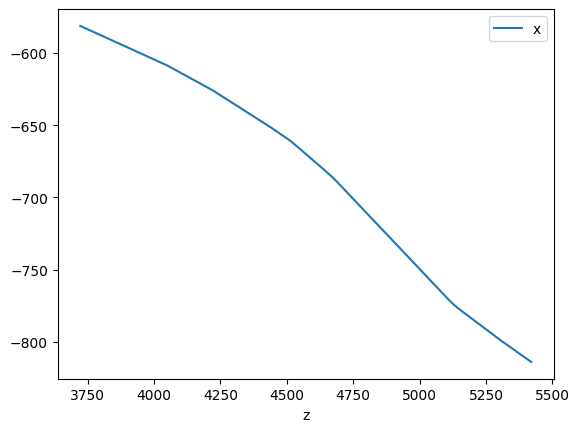

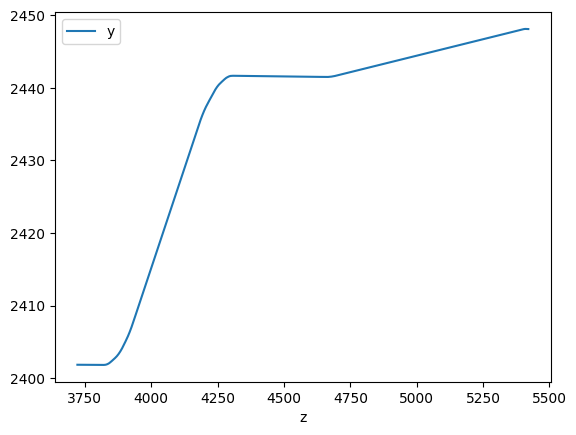

In [20]:
survey.plot(x='z', y='x')
survey.plot(x='z', y='y')